<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment02/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02. Linear Regression
---
## 1. Input data
- I defined a **Linear Function** as $\hat{y} = ax + b$, where $a = 2, b = 25$.
- I used **Numpy's Normal Distribution** for generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$from random perturbations.
- I defined $m = 200$ number of points for the **Normal Distribution** where $mean = 0$ and $\sigma = 30$.

## 2. Linear Regression : Model
- $h_\theta(x) = \theta_0 + \theta_1x$
- I choose the initial conditions for $\theta_0^{(0)} = 10$ and $\theta_1^{(0)} = 3$.

## 3. Linear Regression : Objective Function
- $J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$.
- The calculation for this formula corresponds to a function named **objective_function**.

## 4. Linear Regression : Gradient Descent
- $\theta_0^{(t+1)} \colon= \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$
- $\theta_1^{(t+1)} \colon= \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$
- I choose the initial conditions for $\theta_0^{(0)} = 10$ and $\theta_1^{(0)} = 3$.
- There was some problem to choose a step-size(learning rate). If the step-size is not small enough, the value of $\theta_0$ and $\theta_1$ become divergence.
- So, I choose a step-size $\alpha = 0.0001$ for value's convergence by empirical reasoning.
- The calculation for this formula corresponds to a function named **theta_0_desc** and **theta_1_desc**.
- The convergence condition of cost for iteration escape was set to less than 0.0001 of the change in cost.

## 5. Code & Results Plotting

Total Iterations :  61604
theta_0 :  24.75853028640946 / b :  25
theta_1 :  1.9848755525781516 / a :  2


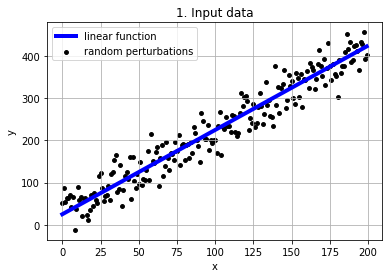

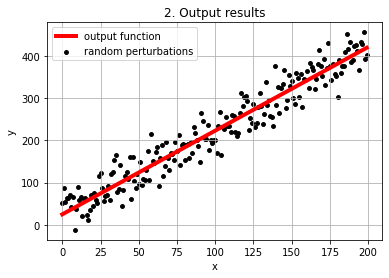

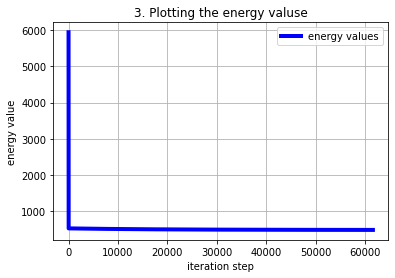

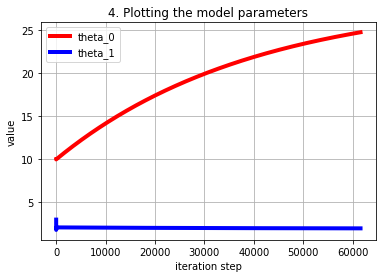

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import random

# generate input data
# for the given assignment requirements

# y_hat = ax + b, line definition
a = 2
b= 25
m = 200
x = [i for i in range(m)]
y_hat = [a*i + b for i in x]

# y = y_hat + n where n~N(0, sigma ** 2)
mean = 0
sigma = 30
n = np.random.normal(mean, sigma, size = m)
y = []

for i in range(m):
  y.append(y_hat[i] + n[i])

# objective_function
# calculate the cost function for each iteration
def objective_function(h, y, m):
  j = []
  for i in range(m):
    j.append(h[i] - y[i])
    j[i] = j[i] ** 2
  return sum(j)/(2*m)


# calculate next iteration's theta_0
def theta_0_desc(theta_0, h, y, m, alpha):
  minus = [h[i]-y[i] for i in range(m)]
  return theta_0 - (alpha*sum(minus)/m)


#calculate next iteration's theta_1
def theta_1_desc(theta_1, h, y, x , m, alpha):
  minus = [(h[i]-y[i])*x[i] for i in range(m)]
  return theta_1 - (alpha*sum(minus)/m)
  
# initial values
theta_0 = 10
theta_1 = 3
alpha = 0.0001

# lists for saving iteration data
cost = []
theta_0_list = []
theta_1_list = []

# iteration for optimizing
iteration = 0

while True:
  h = [theta_0 + theta_1 * i for i in x]
  cost.append(objective_function(h,y,m))
  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)

  if iteration > 0 :
    if cost[iteration-1] - cost[iteration] < 0.0001 :
      break

  theta_0 = theta_0_desc(theta_0, h, y, m, alpha)
  theta_1 = theta_1_desc(theta_1, h, y, x, m, alpha)
  iteration+= 1

# result data
regression_result = [theta_0_list[iteration] + theta_1_list[iteration] * i for i in x] 
iterations = [i for i in range(len(cost))]

print("Total Iterations : ", iteration)
print("theta_0 : ", theta_0_list[iteration], "/ b : ", b)
print("theta_1 : ", theta_1_list[iteration], "/ a : ", a)

# 1. Input data
# a straight line that is the graph of a linear function (in blue color)
# a set of points that have random perturbations
# with respect to the straight line (in black color)
plt.figure(1)
plt.title("1. Input data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_hat, c='b', label="linear function")
plt.scatter(x, y, c='k', s=15, label="random perturbations")
plt.legend()

# 2. Output results
# the set of points that have random perturbations
# with respect to the straight line (in black color)
# a straight line that is the graph of a solution obtained by linear regression
# (in red color)
plt.figure(2)
plt.title("2. Output results")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, regression_result, c='r', label="output function")
plt.scatter(x, y, c='k', s=15, label="random perturbations")
plt.legend()

# 3. Plotting the energy values
# the value of the objective function at every optimization
# step by the gradient descent algorithm (in blue color)
# the optimization should be performed until convergence
plt.figure(3)
plt.title("3. Plotting the energy valuse")
plt.xlabel("iteration step")
plt.ylabel("energy value")
plt.plot(iterations, cost, c='b', label="energy values")
plt.legend()

# 4. Plotting the model parameters
# the value of the model parameters theta_0​ and theta_1​ at every optimization
# step (in red (theta_0) and blue (theta_1​) colors)
# the optimization should be performed until convergence
plt.figure(4)
plt.title("4. Plotting the model parameters")
plt.xlabel("iteration step")
plt.ylabel("value")
plt.plot(iterations, theta_0_list, c='r', label="theta_0")
plt.plot(iterations, theta_1_list, c='b', label="theta_1")
plt.legend()

plt.show()

